In [147]:
import os
import librosa   
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from matplotlib import pyplot 
import random
import soundfile as sf

In [148]:
labels = ['ban', 'a', 'trai', 'phai']
labels_silent = ['silent']

In [149]:
max_length = 30000

In [150]:
train_audio_path = '/content/drive/MyDrive/15 (Nhóm có STT 14 trong danh sách)/train'

all_wave = []
all_label = []
max_length_array = []
dict_ = {"phai": 0, "trai": 0, "ban": 0, "a": 0}
for label in labels:

    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
      try:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 22050)
        # samples = librosa.resample(samples, sample_rate, 8000)
        max_length_array.append(len(samples))
        if len(samples) <= max_length:
          samples = np.pad(samples, (0, max_length - len(samples)%max_length), mode='constant')
        else:
          samples = samples[:max_length]
        if(len(samples)== max_length) : 
            all_wave.append(samples)
            all_label.append(label)
            dict_[label] += 1
      except:
        continue

ban
a
trai
phai


In [151]:
dict_

{'a': 306, 'ban': 286, 'phai': 287, 'trai': 319}

In [152]:
names = os.listdir('/content/drive/MyDrive/15 (Nhóm có STT 14 trong danh sách)/data')

In [153]:
for name in names:
  train_audio_path = '/content/drive/MyDrive/15 (Nhóm có STT 14 trong danh sách)/data/' + name

  for label in labels:
      waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
      for wav in waves:
        try:
          samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 22050)
          # samples = librosa.resample(samples, sample_rate, 8000) 
          max_length_array.append(len(samples))
       
          if len(samples) <= max_length:
            samples = np.pad(samples, (0, max_length - len(samples)%max_length), mode='constant')
          else:
            samples = samples[:max_length]
          if(len(samples)== max_length) : 
              all_wave.append(samples)
              all_label.append(label)
              dict_[label] += 1

        except:
          continue

In [154]:
dict_['silent'] = 0

In [155]:
train_audio_path = '/content/drive/MyDrive/15 (Nhóm có STT 14 trong danh sách)/train/silent/'
for label in labels_silent:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
      try:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 22050)
        # samples = librosa.resample(samples, sample_rate, 8000)
        max_length_array.append(len(samples))
        if len(samples) <= max_length:
          samples = np.pad(samples, (0, max_length - len(samples)%max_length), mode='constant')
        else:
          samples = samples[:max_length]
        if(len(samples)== max_length) : 
            all_wave.append(samples)
            all_label.append(label)
            dict_[label] += 1
      except:
        continue

silent


In [156]:
dict_

{'a': 1214, 'ban': 1170, 'phai': 1137, 'silent': 2121, 'trai': 1267}

In [157]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [160]:
classes

['a', 'ban', 'phai', 'silent', 'trai']

In [162]:
all_labels = ['a', 'ban', 'phai', 'trai', 'silent']

In [163]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(all_labels))
all_wave = np.array(all_wave).reshape(-1,max_length,1)

In [164]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [165]:
x_tr.shape, x_val.shape

((5527, 30000, 1), (1382, 30000, 1))

In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_tr = scaler.fit_transform(x_tr.reshape(-1, 1)).reshape(5527, max_length, 1)
x_val = scaler.fit_transform(x_val.reshape(-1, 1)).reshape(1382, max_length, 1)

In [167]:
K.clear_session()

inputs = Input(shape=(max_length,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(all_labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30000, 1)]        0         
                                                                 
 conv1d (Conv1D)             (None, 29988, 8)          112       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9996, 8)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 9996, 8)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 9986, 16)          1424      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3328, 16)         0         
 1D)                                                         

In [168]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Epoch 1/100
173/173 [==============================] - 6s 29ms/step - loss: 1.2483 - accuracy: 0.4916 - val_loss: 1.0229 - val_accuracy: 0.5658
Epoch 2/100
173/173 [==============================] - 4s 25ms/step - loss: 0.8430 - accuracy: 0.6649 - val_loss: 0.6981 - val_accuracy: 0.7467
Epoch 3/100
173/173 [==============================] - 4s 24ms/step - loss: 0.6454 - accuracy: 0.7577 - val_loss: 0.6160 - val_accuracy: 0.7967
Epoch 4/100
173/173 [==============================] - 4s 24ms/step - loss: 0.5279 - accuracy: 0.8107 - val_loss: 0.4981 - val_accuracy: 0.8517
Epoch 5/100
173/173 [==============================] - 4s 24ms/step - loss: 0.4192 - accuracy: 0.8527 - val_loss: 0.4600 - val_accuracy: 0.8611
Epoch 6/100
173/173 [==============================] - 4s 25ms/step - loss: 0.3620 - accuracy: 0.8782 - val_loss: 0.3642 - val_accuracy: 0.8828
Epoch 7/100
173/173 [==============================] - 4s 24ms/step - loss: 0.2967 - accuracy: 0.9036 - val_loss: 0.3197 - val_accuracy:

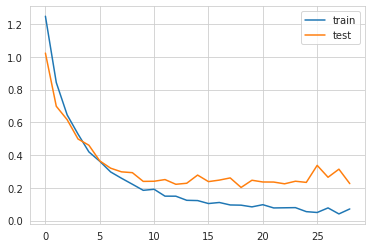

In [169]:
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

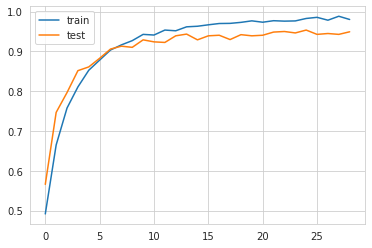

In [170]:
pyplot.plot(history.history['accuracy'], label='train') 
pyplot.plot(history.history['val_accuracy'], label='test') 
pyplot.legend()
pyplot.show()

In [171]:
def predict(audio):
    prob=model.predict(audio)
    for i in range(len(prob[0])):
      print(prob[0][i], "-", classes[i])
    # print(prob)
    # print(max(prob[0]))
    if (max(prob[0]) > 0.8): 
      index=np.argmax(prob[0])
    else:
      return 'silent'
    return classes[index]

In [ ]:
samples, sample_rate = librosa.load('/content/drive/MyDrive/command_phai.wav', sr = 22050)

if len(samples) <= max_length:
  samples = np.pad(samples, (0, max_length - len(samples)%max_length), mode='constant')
else:
  samples = samples[:max_length]
samples = scaler.fit_transform(samples.reshape(-1, 1)).reshape(1, max_length, 1)
  
predict(samples)

In [ ]:
samples, sample_rate = librosa.load('/content/drive/MyDrive/command_a.wav', sr = 22050)
print(len(samples))
samples = samples[0:30000]
# samples, index = librosa.effects.trim(samples, top_db=50, frame_length=256, hop_length=64)
samples = librosa.resample(samples, sample_rate, max_length)

# print(samples)
ipd.Audio(samples,rate=max_length)

In [ ]:
model.save("/content/drive/MyDrive/15 (Nhóm có STT 14 trong danh sách)/model_30000.h5")

In [ ]:
from tensorflow import keras
model_load = keras.models.load_model("/content/drive/MyDrive/15 (Nhóm có STT 14 trong danh sách)/model_30000.h5")